PROJECT 9: A DATA ANALYSIS OF YOUR OWN
NAME: RURU & MANIKO
CONTRIBUTORS: StackOverflow, YouTube

In [2]:
import requests
import json
from bs4 import BeautifulSoup

from urllib.parse import unquote, quote
from datetime import datetime

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Choosing a topic and finding data

We looked at all six sources and the one we found the most interesting was in the database called "Our World in Data". Here we found the dataset called "Gender development index". The Gender Development Index (GDI) is a composite index that measures the achievement of a country in terms of gender equality. It takes into account factors such as life expectancy, education, and income to assess the overall well-being of both men and women.


# Part 2: Conduct your Analysis & Visualization 

We decided to use Jupyter Notebook for our data analysis. Furthermore, we had four main questions.

1) What factors contribute to countries with low Gender Development Index?
2) What countries have the highest Gender Development Index?
3) What countries have the lowest Gender Development Index?
4) What is the correlation matrix between Gender Development Index and other indicators such as income, life expectancy, e.t.c?
5) Which year did countries see the highest Gender Development Index in?

In [ ]:
# Gender Development Index Distribution:
Calculate the mean, median, and standard deviation of the GDI.
Create a histogram to visualize the distribution of GDIs across different countries.

In [3]:
hdi_df = pd.read_csv('gender-development-index.csv')
hdi_df

,Entity,Code,Year,Gender Development Index
0,Afghanistan,AFG,1990,0.595
1,Afghanistan,AFG,1991,0.588
2,Afghanistan,AFG,1992,0.586
3,Afghanistan,AFG,1993,0.548
4,Afghanistan,AFG,1994,0.524
...,...,...,...,...
5211,Zimbabwe,ZWE,2017,0.952
5212,Zimbabwe,ZWE,2018,0.952
5213,Zimbabwe,ZWE,2019,0.955
5214,Zimbabwe,ZWE,2020,0.959


# Statistics

In [4]:
print(hdi_df.columns.tolist())

['Entity', 'Code', 'Year', 'Gender Development Index']


In [5]:
# Finding the overall mean for the GDI
mean_gdi = hdi_df["Gender Development Index"].mean()
mean_gdi

0.9192879601226994

In [6]:
# Finding the overall max fro the GDi
median_gdi = hdi_df["Gender Development Index"].median()
median_gdi

0.945

In [7]:
# Finding the standard deviation 
std_gdi = hdi_df["Gender Development Index"].std()
std_gdi

0.08257699331128965

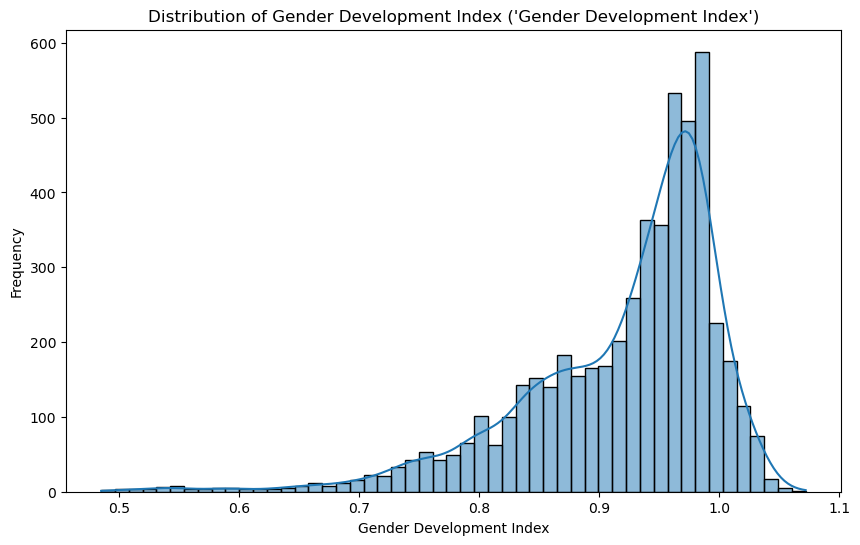

Mean GDI: 0.92
Median GDI: 0.94
Standard Deviation GDI: 0.08


In [8]:
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(hdi_df["Gender Development Index"], kde=True)
plt.title("Distribution of Gender Development Index ('Gender Development Index')")
plt.xlabel("Gender Development Index")
plt.ylabel('Frequency')
plt.show()


print(f"Mean GDI: {mean_gdi:.2f}")
print(f"Median GDI: {median_gdi:.2f}")
print(f"Standard Deviation GDI: {std_gdi:.2f}")

In [9]:
USA = hdi_df[hdi_df['Entity'] == "United States"]
USA

,Entity,Code,Year,Gender Development Index
4911,United States,USA,1990,0.987
4912,United States,USA,1991,0.988
4913,United States,USA,1992,0.988
4914,United States,USA,1993,0.987
4915,United States,USA,1994,0.988
4916,United States,USA,1995,0.989
4917,United States,USA,1996,0.987
4918,United States,USA,1997,0.988
4919,United States,USA,1998,0.991
4920,United States,USA,1999,0.990


# Country's uncertainities contribute to the low GDI

<Axes: xlabel='Year', ylabel='Gender Development Index'>

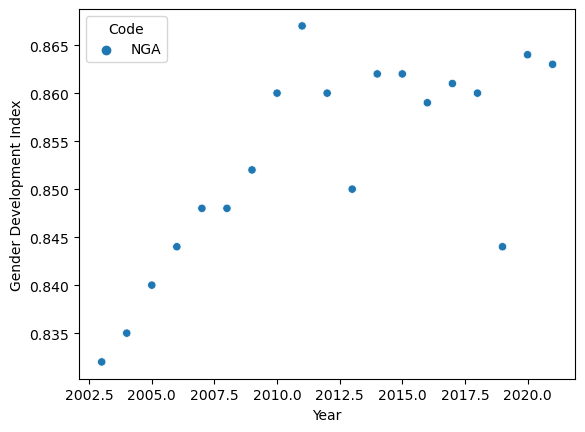

In [10]:
# The GDI varies from time to time just because 
Nigeria = hdi_df[hdi_df['Entity'] == "Nigeria"]
sns.scatterplot( x = "Year", 
                 y = "Gender Development Index", 
                 data = Nigeria, 
                 hue = "Code")

<Axes: xlabel='Year', ylabel='Gender Development Index'>

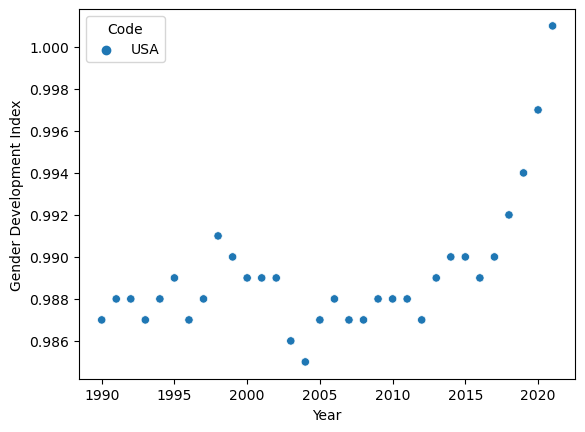

In [23]:
#me too movement
USA = hdi_df[hdi_df['Entity'] == "United States"]
sns.scatterplot( x = "Year", 
                 y = "Gender Development Index", 
                 data = USA, 
                 hue = "Code")

# Top and Bottom Countries in Gender Development:
Identify the top and bottom countries based on their GDIs.
Create a bar chart to visualize the GDIs of these countries.

In [12]:
# Top 5 countries with highest GDI
top_countries = hdi_df.nlargest(5, "Gender Development Index")
top_countries

,Entity,Code,Year,Gender Development Index
2617,Lesotho,LSO,1990,1.072
2618,Lesotho,LSO,1991,1.060
2619,Lesotho,LSO,1992,1.053
3837,Russia,RUS,2003,1.050
3838,Russia,RUS,2004,1.050


In [13]:
# Bottom 5 countries with lowest GDI
bottom_countries = hdi_df.nsmallest(5, "Gender Development Index")
bottom_countries

,Entity,Code,Year,Gender Development Index
5147,Yemen,YEM,2017,0.485
5151,Yemen,YEM,2021,0.496
5148,Yemen,YEM,2018,0.500
11,Afghanistan,AFG,2001,0.504
5149,Yemen,YEM,2019,0.508


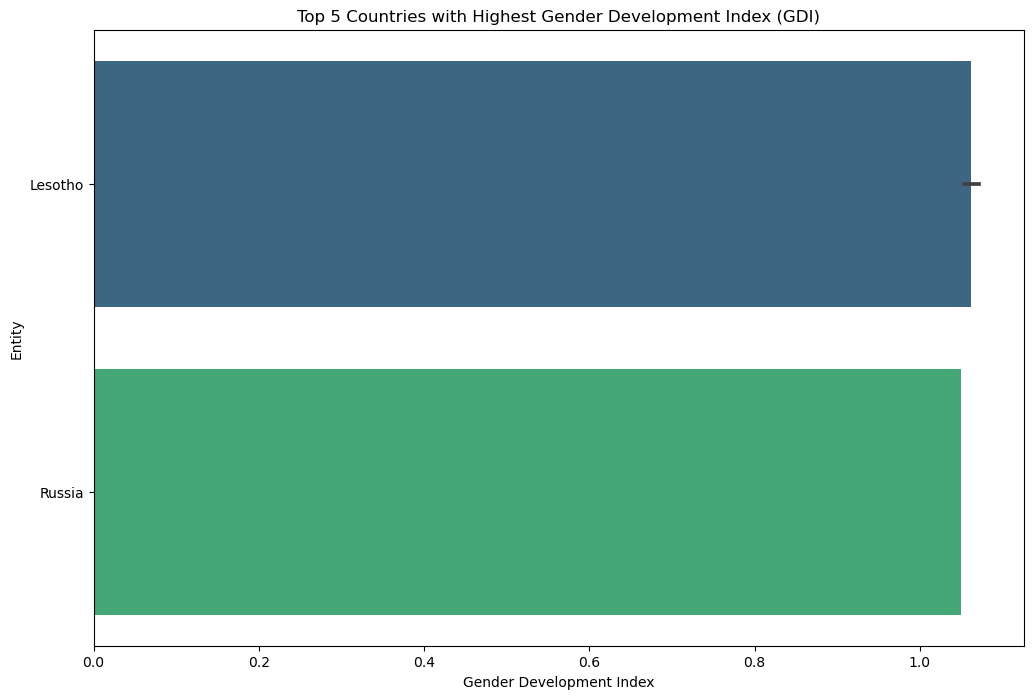

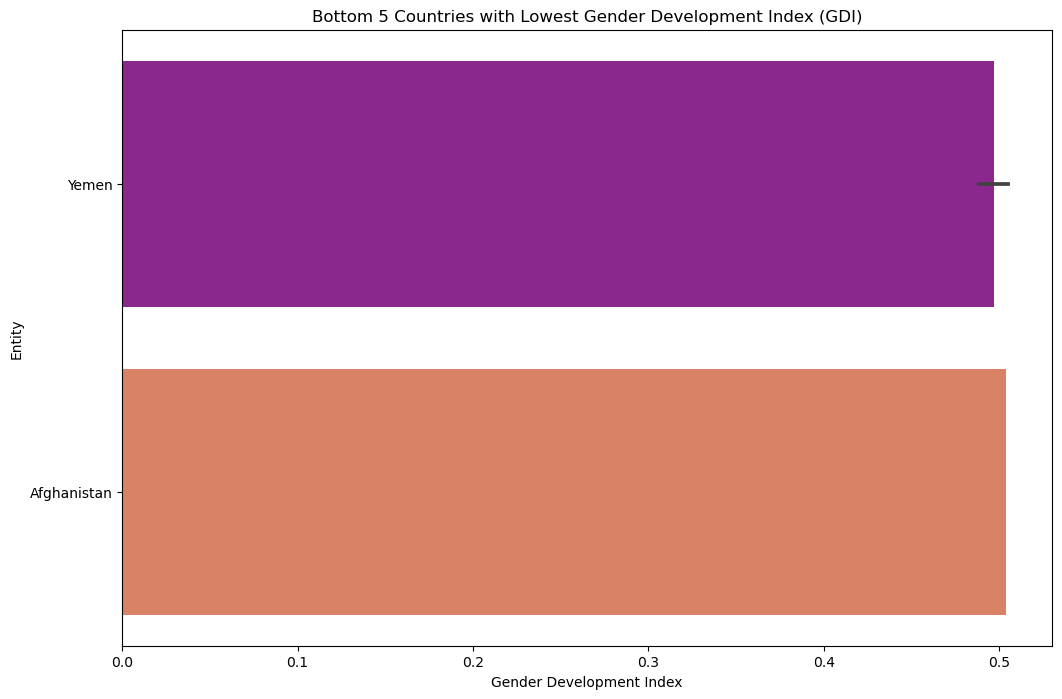

In [15]:
# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x="Gender Development Index", y="Entity", data=top_countries, palette='viridis')
plt.title('Top 5 Countries with Highest Gender Development Index (GDI)')
plt.xlabel("Gender Development Index")
plt.ylabel("Entity")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x="Gender Development Index", y="Entity", data=bottom_countries, palette='plasma')
plt.title('Bottom 5 Countries with Lowest Gender Development Index (GDI)')
plt.xlabel("Gender Development Index")
plt.ylabel("Entity")
plt.show()

Correlation between GDI and Other Indicators:
The correlation between GDI and other development indicators such as life expectancy, education, and income.

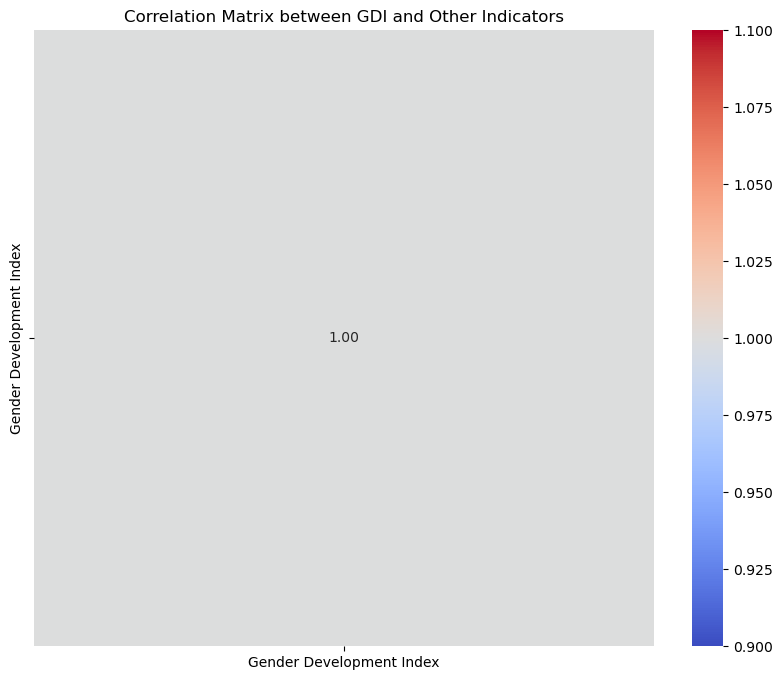

In [19]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between GDI and Other Indicators')
plt.show()

In [21]:
Kenya =  hdi_df[hdi_df['Entity'] == "Kenya"]
Kenya

,Entity,Code,Year,Gender Development Index
2425,Kenya,KEN,1990,0.864
2426,Kenya,KEN,1991,0.876
2427,Kenya,KEN,1992,0.871
2428,Kenya,KEN,1993,0.873
2429,Kenya,KEN,1994,0.876
2430,Kenya,KEN,1995,0.878
2431,Kenya,KEN,1996,0.881
2432,Kenya,KEN,1997,0.912
2433,Kenya,KEN,1998,0.882
2434,Kenya,KEN,1999,0.881
